<a href="https://colab.research.google.com/github/suminpixel/computer-vision-class/blob/main/stock_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir dataset #lstm
!pip install gdown

In [5]:
!gdown --id 1GyR-SosHKXFVpAWIV7Smotz3sp7l5vQE --output dataset/stock_samsung.csv

Downloading...
From: https://drive.google.com/uc?id=1GyR-SosHKXFVpAWIV7Smotz3sp7l5vQE
To: /content/dataset/stock_samsung.csv
100% 104k/104k [00:00<00:00, 38.4MB/s]


Epoch 1/20
106/106 [==============================] - 5s 25ms/step - loss: nan - val_loss: nan
Epoch 2/20
106/106 [==============================] - 2s 21ms/step - loss: nan - val_loss: nan
Epoch 3/20
106/106 [==============================] - 2s 21ms/step - loss: nan - val_loss: nan
Epoch 4/20
106/106 [==============================] - 2s 21ms/step - loss: nan - val_loss: nan
Epoch 5/20
106/106 [==============================] - 2s 21ms/step - loss: nan - val_loss: nan
Epoch 6/20
106/106 [==============================] - 2s 21ms/step - loss: nan - val_loss: nan
Epoch 7/20
106/106 [==============================] - 2s 21ms/step - loss: nan - val_loss: nan
Epoch 8/20
106/106 [==============================] - 2s 21ms/step - loss: nan - val_loss: nan
Epoch 9/20
106/106 [==============================] - 2s 21ms/step - loss: nan - val_loss: nan
Epoch 10/20
106/106 [==============================] - 2s 21ms/step - loss: nan - val_loss: nan
Epoch 11/20
106/106 [============================

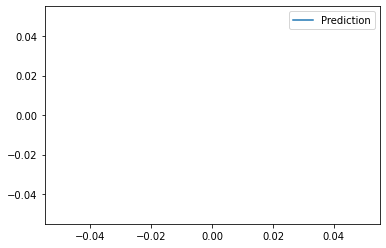

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
import datetime

data = pd.read_csv('dataset/stock_samsung.csv') #데이터 유효성 검사
data.head() #상위 다섯개 정도 출력

high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

#lstm 에서 window 라는 개념 => LSTM의 기본인 이전데이터를 '얼마나(윈도우 사이즈, 하이퍼 파라미터)' 가지고 와서 어떻게 학습할래 
seq_len = 50 #windows size
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length) :
  result.append(mid_prices[index: index+sequence_length])

#노말라이제이션
normalized_data = []
for window in result :
  normalized_window = [(float(p) / float(window[0]) - 1) for p in window]
  normalized_data.append(normalized_window)

result = np.array(normalized_data)

#트레이닝 데이터 생성
#데이터의 90% 정도 테스트 셋, 10%정도 test
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

#트레이닝 위한 90%
x_train = train[:, :-1] #50개
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1] #1개 

#검증을 위한 10%
x_test = result[row:, :-1] #50개
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1] #개

x_train.shape, x_test.shape

model = Sequential()

#model.add(LSTM(50, return_sequences=True, input_shape(50, 1)))
model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear')) #예측 데이터
model.compile(loss='mse', optimizer='rmsprop') #에러체크 #loss 율 0.12 이상 넘어가면 상용화 불가...
#model.summary()

model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=20) #batch size 10으로 20번 반복할거야 


pred = model.predict(x_test)

fig = plt.figure(facecolor='white')

ax = fig.add_subplot(111)
ax.plot(y_test, label='Origin')
ax.plot(pred, label='Prediction')

ax.legend()
plt.show()
